In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import numpy as np
%matplotlib inline

In [3]:
os.chdir('/Users/JTBras/Downloads')

In [6]:
da = pd.read_csv('Data.csv')

In [17]:
da.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [19]:
da.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [20]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


In [25]:
da['Country']

0     France
1      Spain
2    Germany
3      Spain
4    Germany
5     France
6      Spain
7     France
8    Germany
9     France
Name: Country, dtype: object

In [26]:
data = da.fillna(da.mean())

In [28]:
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,No
1,Spain,27.0,48000.000000,Yes
2,Germany,30.0,54000.000000,No
3,Spain,38.0,61000.000000,No
4,Germany,40.0,63777.777778,Yes


In [29]:
pd.get_dummies(data['Country'])

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,1,0,0
8,0,1,0
9,1,0,0


In [30]:
data['Country'].value_counts()

France     4
Spain      3
Germany    3
Name: Country, dtype: int64

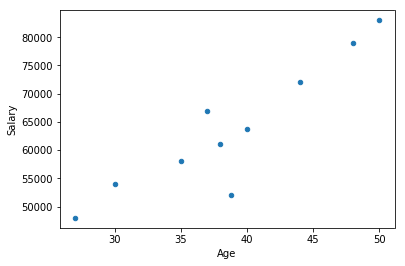

In [37]:
data.plot.scatter('Age','Salary')

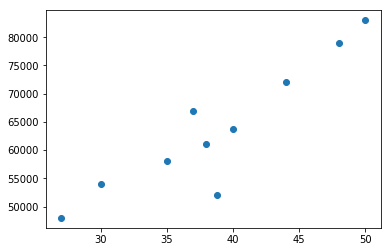

In [39]:
plt.scatter(data.loc[:,'Age'],data.loc[:,'Salary'])

Sight data set


In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [8]:
signdist = pd.read_table("https://mheaton.byu.edu/Courses/StatResearch/330inPython/VisionDistance/signdist.txt")

In [9]:
signdist.head()

,Age,Distance
0,18,510
1,20,590
2,22,560
3,23,510
4,23,460


In [10]:
signdist.corr()

,Age,Distance
Age,1.000000,-0.801245
Distance,-0.801245,1.000000


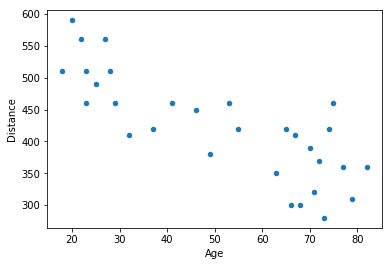

In [11]:
signdist.plot.scatter('Age','Distance')

In [9]:
import seaborn as sns

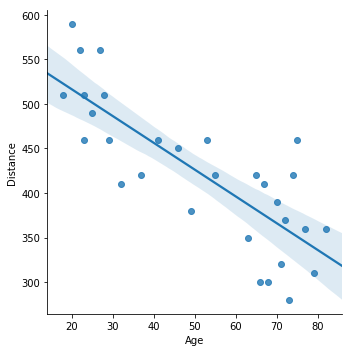

In [15]:
sns.lmplot(x='Age',y='Distance',data=signdist)

In [13]:
import statsmodels.formula.api as smf

In [25]:
X = signdist['Age']
y=signdist['Distance']

In [34]:
model = smf.ols('Distance~Age',data=signdist).fit()

In [16]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     50.21
Date:                Wed, 17 Jan 2018   Prob (F-statistic):           1.04e-07
Time:                        14:07:43   Log-Likelihood:                -158.75
No. Observations:                  30   AIC:                             321.5
Df Residuals:                      28   BIC:                             324.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    576.6819     23.471     24.570      0.0

jarque- bera test= normality want p to be above .5

durbin-watson: test of independence-temporal dependence

In [19]:
#check assumptions-histogram

(array([ 8.,  5.,  9.,  6.,  2.]),
 array([-1.57211242, -0.82028136, -0.0684503 ,  0.68338076,  1.43521181,
         2.18704287]),
 <a list of 5 Patch objects>)

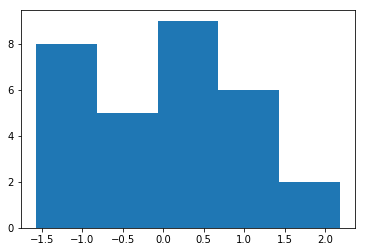

In [23]:
plt.hist(model.resid_pearson,bins=5)

equal variance- fitted values vs residuals

Text(0,0.5,'Std. resids')

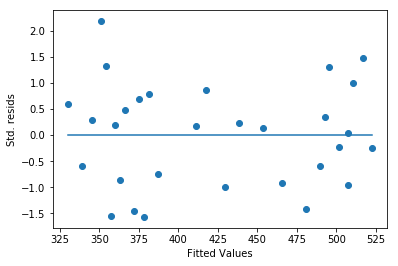

In [28]:
plt.scatter(model.fittedvalues,model.resid_pearson)
plt.plot([model.fittedvalues.min(),model.fittedvalues.max()],[0,0])
plt.xlabel('Fitted Values')
plt.ylabel('Std. resids')

In [29]:
import statsmodels.stats.api as sm #bp test

/Users/JTBras/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [36]:
sm.het_breuschpagan(model.resid_pearson,model.model.exog)


(0.93883754235911332,
 0.33257697541751108,
 0.90455607976354713,
 0.3497011253397696)

In [37]:
#hypothesis testing

In [42]:
print(model.summary(alpha=.01)) #make 99% CI

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     50.21
Date:                Wed, 17 Jan 2018   Prob (F-statistic):           1.04e-07
Time:                        14:26:51   Log-Likelihood:                -158.75
No. Observations:                  30   AIC:                             321.5
Df Residuals:                      28   BIC:                             324.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.005      0.995]
------------------------------------------------------------------------------
Intercept    576.6819     23.471     24.570      0.0

In [44]:
#predictions
import numpy as np

In [62]:
pred_df = pd.DataFrame(dict(Age=np.linspace(signdist['Age'].min(),signdist['Age'].max(),num=100)))

In [63]:
pred_df.head()

,Age
0,18.000000
1,18.646465
2,19.292929
3,19.939394
4,20.585859


In [64]:
pred_df.min()

Age    18.0
dtype: float64

In [65]:
mypreds = model.get_prediction(pred_df)

In [66]:
mypreds.conf_int(alpha=.05)

array([[ 488.3665597 ,  556.75124134],
       [ 486.89275502,  554.3374205 ],
       [ 485.41609822,  551.92645177],
       [ 483.93646742,  549.51845704],
       [ 482.45373451,  547.11356442],
       [ 480.96776487,  544.71190854],
       [ 479.47841698,  542.3136309 ],
       [ 477.98554211,  539.91888024],
       [ 476.48898392,  537.5278129 ],
       [ 474.9885781 ,  535.1405932 ],
       [ 473.48415193,  532.75739384],
       [ 471.97552394,  530.3783963 ],
       [ 470.46250346,  528.00379125],
       [ 468.94489021,  525.63377897],
       [ 467.42247389,  523.26856976],
       [ 465.89503375,  520.90838437],
       [ 464.36233819,  518.55345441],
       [ 462.82414435,  516.20402272],
       [ 461.28019774,  513.8603438 ],
       [ 459.73023187,  511.52268414],
       [ 458.17396793,  509.19132255],
       [ 456.61111452,  506.86655044],
       [ 455.04136739,  504.54867204],
       [ 453.46440931,  502.23800459],
       [ 451.87991   ,  499.93487837],
       [ 450.2875261 ,  4

In [69]:
mypreds.predicted_mean

array([ 522.55890052,  520.61508776,  518.671275  ,  516.72746223,
        514.78364947,  512.8398367 ,  510.89602394,  508.95221118,
        507.00839841,  505.06458565,  503.12077288,  501.17696012,
        499.23314735,  497.28933459,  495.34552183,  493.40170906,
        491.4578963 ,  489.51408353,  487.57027077,  485.62645801,
        483.68264524,  481.73883248,  479.79501971,  477.85120695,
        475.90739419,  473.96358142,  472.01976866,  470.07595589,
        468.13214313,  466.18833037,  464.2445176 ,  462.30070484,
        460.35689207,  458.41307931,  456.46926655,  454.52545378,
        452.58164102,  450.63782825,  448.69401549,  446.75020273,
        444.80638996,  442.8625772 ,  440.91876443,  438.97495167,
        437.03113891,  435.08732614,  433.14351338,  431.19970061,
        429.25588785,  427.31207508,  425.36826232,  423.42444956,
        421.48063679,  419.53682403,  417.59301126,  415.6491985 ,
        413.70538574,  411.76157297,  409.81776021,  407.87394

In [78]:
#plot predictions on scatterplot
upper = mypreds.summary_frame()['obs_ci_upper']
lower= mypreds.summary_frame()['obs_ci_lower']

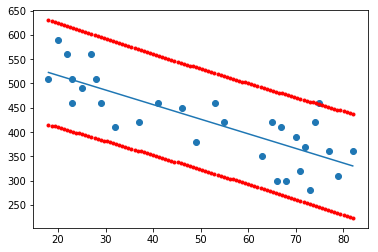

In [80]:
plt.scatter(signdist['Age'],signdist['Distance'])
plt.plot(pred_df['Age'],mypreds.predicted_mean)
plt.plot(pred_df['Age'],upper,'.r')
plt.plot(pred_df['Age'],lower,'.r')
